# Function to automatic merge and fill missing values


In [225]:
import pandas as pd
import numpy as np
from datetime import datetime


## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated. 

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [226]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [227]:
print(len(df_main['DATE']))
print(len(df_opinion['date']))

365
341


In [228]:
df_opinion = df_opinion.rename(columns = {'date':'DATE'})
df_opinion

,DATE,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad
2,2018-03-09,116,0,3,10.2,bad
3,2018-10-07,122,0,1,5.6,bad
4,2018-06-18,119,0,1,12.9,bad
...,...,...,...,...,...,...
336,2018-04-20,113,0,1,11.6,very good
337,2018-06-08,116,0,1,15.9,very good
338,2018-09-09,113,0,1,11.6,very good
339,2018-10-13,113,0,5,11.0,very good


In [240]:
def merge_and_fill(df_main, df_opinion):
    df_opinion = df_opinion.rename(columns = {'date':'DATE'})
    # Merging the two dataframes
    new_df = pd.merge(df_main, df_opinion, how='left', on= 'DATE')
    
    # Creating a new column 'flag' that is true if the value in 'OPINION' is missing
    new_df['flag'] = new_df['OPINION'].isna()
    
    # Filling missing values
    new_df['WEATHER_CODE_EVENING'].fillna(new_df['WEATHER_CODE_EVENING'].mean(), inplace = True)
    new_df['TOTAL_SNOW_MM'].fillna(new_df['TOTAL_SNOW_MM'].mean(), inplace = True)
    new_df['UV_INDEX'].fillna(new_df['UV_INDEX'].mean(), inplace = True)
    new_df['SUNHOUR'] = new_df['SUNHOUR'].ffill().bfill()
    new_df['OPINION'] = new_df['OPINION'].fillna("unknown")
    
    # Translation of the 'OPINION' column
    opinion = {'bad': 'mauvais', 'very bad': 'très mauvais', 'not good not bad': 'ni bon ni mauvais', 'good': 'bon', 'very good': 'très bon', 'unknown': 'inconnu'}
    new_df['OPINION'] = new_df['OPINION'].map(opinion)
    new_df['OPINION'].fillna("inconnu", inplace = True)
    new_df['DATE'] = pd.to_datetime(new_df['DATE'])
    new_df['MONTH']= new_df['DATE'].apply(lambda x: x.month)
    new_df['DAY']= new_df['DATE'].apply(lambda x: x.day)

    return new_df

NewDataFrame = merge_and_fill(df_main, df_opinion)
NewDataFrame

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,12,6,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,13,7,122.0,0.0,3.0,3.3,mauvais,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,12,10,116.0,0.0,3.0,3.3,mauvais,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,10,7,116.0,0.0,3.0,6.9,mauvais,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,6,3,119.0,0.0,1.0,8.7,très mauvais,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,4,4,113.0,0.0,1.0,8.7,très mauvais,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,5,1,116.0,0.0,1.0,8.7,très mauvais,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,9,7,143.0,0.0,1.0,3.3,très mauvais,False,12,30


In [230]:
'''NewDataFrame['OPINION'] = NewDataFrame['OPINION'].fillna("unknown")
   NewDataFrame['OPINION'] = NewDataFrame['OPINION'].apply(translation)
def merge_and_fill(DataFrameMain, DataFrameOpinion):

  NewDataFrame = pd.merge(df_main, df_opinion, how='left', on= 'DATE')
  NewDataFrame['flag'] = NewDataFrame['OPINION'].isna()

  mean_weather_column = NewDataFrame['WEATHER_CODE_EVENING'].mean()
  NewDataFrame['WEATHER_CODE_EVENING'].fillna(mean_weather_column, inplace = True)
  mean_total_snow = NewDataFrame['TOTAL_SNOW_MM'].mean()
  mean_uv = NewDataFrame['UV_INDEX'].mean()

  NewDataFrame['TOTAL_SNOW_MM'].fillna(mean_total_snow, inplace = True)
  NewDataFrame['UV_INDEX'].fillna(mean_uv, inplace = True)
  NewDataFrame['SUNHOUR'] = NewDataFrame['SUNHOUR'].ffill().bfill()
  NewDataFrame['OPINION'] = NewDataFrame['OPINION'].map(opinion)
  NewDataFrame['OPINION'].fillna("inconnu", inplace = True)


  NewDataFrame['DATE'] = pd.to_datetime(NewDataFrame['DATE'])
  NewDataFrame['MONTH']= NewDataFrame['DATE'].apply(lambda x: x.month)
  NewDataFrame['DAY']= NewDataFrame['DATE'].apply(lambda x: x.day)

  return NewDataFrame

NewDataFrame = merge_and_fill(df_main, df_opinion)
NewDataFrame'''

'NewDataFrame[\'OPINION\'] = NewDataFrame[\'OPINION\'].fillna("unknown")\n   NewDataFrame[\'OPINION\'] = NewDataFrame[\'OPINION\'].apply(translation)\ndef merge_and_fill(DataFrameMain, DataFrameOpinion):\n\n  NewDataFrame = pd.merge(df_main, df_opinion, how=\'left\', on= \'DATE\')\n  NewDataFrame[\'flag\'] = NewDataFrame[\'OPINION\'].isna()\n\n  mean_weather_column = NewDataFrame[\'WEATHER_CODE_EVENING\'].mean()\n  NewDataFrame[\'WEATHER_CODE_EVENING\'].fillna(mean_weather_column, inplace = True)\n  mean_total_snow = NewDataFrame[\'TOTAL_SNOW_MM\'].mean()\n  mean_uv = NewDataFrame[\'UV_INDEX\'].mean()\n\n  NewDataFrame[\'TOTAL_SNOW_MM\'].fillna(mean_total_snow, inplace = True)\n  NewDataFrame[\'UV_INDEX\'].fillna(mean_uv, inplace = True)\n  NewDataFrame[\'SUNHOUR\'] = NewDataFrame[\'SUNHOUR\'].ffill().bfill()\n  NewDataFrame[\'OPINION\'] = NewDataFrame[\'OPINION\'].map(opinion)\n  NewDataFrame[\'OPINION\'].fillna("inconnu", inplace = True)\n\n\n  NewDataFrame[\'DATE\'] = pd.to_datetime

In [241]:
print("My DataFrame shape is : ", NewDataFrame.shape, end = '\n\n\n\n')
print(NewDataFrame.info())

My DataFrame shape is :  (365, 23)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MA

In [242]:
main11 = pd.read_csv(f"https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv")
opinion11 = pd.read_csv(f"https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv")

NewDataFrame11 = merge_and_fill(main11, opinion11)
NewDataFrame11

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,12,6,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,13,7,122.0,0.0,3.0,3.3,mauvais,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,12,10,116.0,0.0,3.0,3.3,mauvais,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,10,7,116.0,0.0,3.0,6.9,mauvais,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,6,3,119.0,0.0,1.0,8.7,très mauvais,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,4,4,113.0,0.0,1.0,8.7,très mauvais,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,5,1,116.0,0.0,1.0,8.7,très mauvais,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,9,7,143.0,0.0,1.0,3.3,très mauvais,False,12,30


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [243]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

final_df = pd.DataFrame()

for year in range(2010, 2019):

  main = pd.read_csv(f"https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_{year}.csv")
  opinion = pd.read_csv(f"https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_{year}.csv")
  merged_df = merge_and_fill(main, opinion)
  final_df = final_df.append(merged_df)





In [244]:
final_df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2010-01-01,5,2,19,2,5,3,0.0,86,10.000,...,3,-1,119.0,0.0,1.0,5.1,très mauvais,False,1,1
1,2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,...,0,2,116.0,0.0,1.0,8.7,très mauvais,False,1,2
2,2010-01-03,5,1,26,2,4,2,0.3,61,9.875,...,0,-3,119.0,0.0,1.0,6.9,très mauvais,False,1,3
3,2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,...,0,-9,113.0,0.0,1.0,8.7,très mauvais,False,1,4
4,2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,...,0,-10,113.0,0.0,1.0,8.7,très mauvais,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,6,3,119.0,0.0,1.0,8.7,très mauvais,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,4,4,113.0,0.0,1.0,8.7,très mauvais,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,5,1,116.0,0.0,1.0,8.7,très mauvais,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,9,7,143.0,0.0,1.0,3.3,très mauvais,False,12,30


## Add 2019 & 2020

In [235]:
link2019 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
link2020 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"

df_2019 = pd.read_csv(link2019)
df_2020 = pd.read_csv(link2020)

In [236]:
opinion = {'bad': 'mauvais', 'very bad': 'très mauvais', 'not good not bad': 'ni bon ni mauvais', 'good': 'bon', 'very good': 'très bon', 'unknown': 'inconnu'}
def translation(words):
    value = opinion[words]
    return value

words= 'unknown'
translation(words)

'inconnu'

In [237]:
opinion = {'bad': 'mauvais', 'very bad': 'très mauvais', 'not good not bad': 'ni bon ni mauvais', 'good': 'bon', 'very good': 'très bon', 'unknown': 'inconnu'}
df_2019['OPINION'] = df_2019['OPINION'].apply(translation)
df_2019

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,3,116,143,176,0,1,5.1,très mauvais,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,3,119,116,116,0,1,8.7,très mauvais,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,-4,116,116,116,0,1,8.7,très mauvais,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,-4,116,116,122,0,1,5.1,très mauvais,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,-2,143,116,116,0,1,8.7,très mauvais,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,8,119,143,116,0,1,8.7,ni bon ni mauvais,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,4,143,116,116,0,1,6.9,très mauvais,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,0,116,116,116,0,1,8.7,très mauvais,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,4,113,113,113,0,1,8.7,très mauvais,12,30


In [239]:
df_2020['OPINION'] = df_2020['OPINION'].apply(translation)
df_2020

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,...,8,353,248,353,0,1,3.3,mauvais,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,...,8,122,122,122,0,1,3.3,mauvais,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,...,8,176,116,176,0,1,5.1,mauvais,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,...,3,113,116,116,0,1,8.7,très mauvais,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,...,3,116,116,116,0,1,8.7,très mauvais,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,10,9,48,9,10,7,24.3,86,8.125,...,5,176,302,299,0,2,3.3,très mauvais,12,27
362,2020-12-28,8,4,41,4,8,6,9.4,84,9.250,...,0,176,299,353,0,2,3.3,très mauvais,12,28
363,2020-12-29,8,4,17,4,7,5,1.8,91,9.500,...,0,176,116,353,0,2,8.7,très mauvais,12,29
364,2020-12-30,7,3,18,3,6,5,1.2,91,9.875,...,-1,116,116,122,0,2,6.9,très mauvais,12,30


In [247]:
# Concatenate the cleaned data for each year
final_dfs = pd.concat([final_df, df_2019, df_2020])
final_dfs.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,WEATHER_CODE_MORNING,WEATHER_CODE_NOON
0,2010-01-01 00:00:00,5,2,19,2,5,3,0.0,86,10.000,...,119.0,0.0,1.0,5.1,très mauvais,False,1,1,NaN,NaN
1,2010-01-02 00:00:00,5,-1,6,-1,4,1,0.0,78,10.000,...,116.0,0.0,1.0,8.7,très mauvais,False,1,2,NaN,NaN
2,2010-01-03 00:00:00,5,1,26,2,4,2,0.3,61,9.875,...,119.0,0.0,1.0,6.9,très mauvais,False,1,3,NaN,NaN
3,2010-01-04 00:00:00,1,-4,25,-2,0,-3,0.0,75,10.000,...,113.0,0.0,1.0,8.7,très mauvais,False,1,4,NaN,NaN
4,2010-01-05 00:00:00,2,-5,20,-5,1,-4,0.0,71,10.000,...,113.0,0.0,1.0,8.7,très mauvais,False,1,5,NaN,NaN


In [251]:
final_dfs['DATE'] = pd.to_datetime(final_dfs['DATE'])
final_dfs

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,WEATHER_CODE_MORNING,WEATHER_CODE_NOON
0,2010-01-01,5,2,19,2,5,3,0.0,86,10.000,...,119.0,0.0,1.0,5.1,très mauvais,False,1,1,NaN,NaN
1,2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,...,116.0,0.0,1.0,8.7,très mauvais,False,1,2,NaN,NaN
2,2010-01-03,5,1,26,2,4,2,0.3,61,9.875,...,119.0,0.0,1.0,6.9,très mauvais,False,1,3,NaN,NaN
3,2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,...,113.0,0.0,1.0,8.7,très mauvais,False,1,4,NaN,NaN
4,2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,...,113.0,0.0,1.0,8.7,très mauvais,False,1,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,10,9,48,9,10,7,24.3,86,8.125,...,299.0,0.0,2.0,3.3,très mauvais,NaN,12,27,176.0,302.0
362,2020-12-28,8,4,41,4,8,6,9.4,84,9.250,...,353.0,0.0,2.0,3.3,très mauvais,NaN,12,28,176.0,299.0
363,2020-12-29,8,4,17,4,7,5,1.8,91,9.500,...,353.0,0.0,2.0,8.7,très mauvais,NaN,12,29,176.0,116.0
364,2020-12-30,7,3,18,3,6,5,1.2,91,9.875,...,122.0,0.0,2.0,6.9,très mauvais,NaN,12,30,116.0,116.0


# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 11 seasonality for the 11 summers/winters alternance.




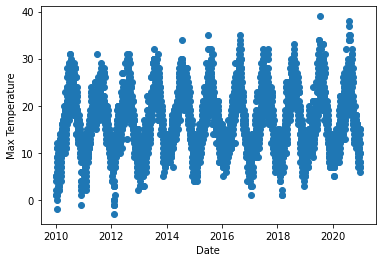

In [252]:
import matplotlib.pyplot as plt

plt.scatter(final_dfs['DATE'], final_dfs['MAX_TEMPERATURE_C'])
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.show()

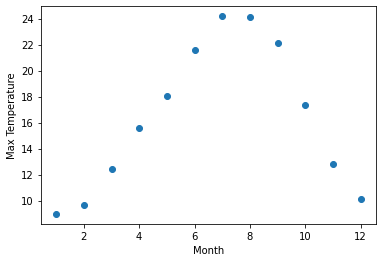

In [253]:
data_monthly = final_dfs.groupby(final_dfs['DATE'].dt.month)['MAX_TEMPERATURE_C'].mean()
plt.scatter(data_monthly.index, data_monthly.values)
plt.xlabel('Month')
plt.ylabel('Max Temperature')
plt.show()


Find appropriate dataviz to answer to this question : 

Which year had the best weather? Are years very different or not ?


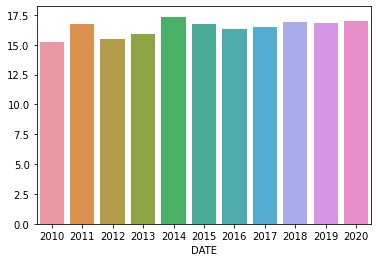

In [257]:
import seaborn as sns

# Group the data by year and calculate the average temperature for each year
df_yearly = final_dfs.groupby(final_dfs['DATE'].dt.year)['MAX_TEMPERATURE_C'].mean()

# Create a bar chart
sns.barplot(x=df_yearly.index, y=df_yearly.values)
